In [1]:
from HTC import HTC
from HTC_plot import plotHTC

In [2]:
plotter = plotHTC()

Init plotter


In [3]:
folder = 'results/connectome/'
mod = HTC.loadFromName(folder+'connectome_66_0.0_1.5_0.01_50_0.73_0')

CREATED Network=connectome, N=66, id=0 ...



Per tre valori dell'order parameter ($T<T_c$, $T=T_c$, $T>T_c$), ho plottato:
- uno sketch della time series del valore medio di attivazione
- uno sketch della time series del valore medio di attivazione per la rete normalizzata
- Power spectrum dell'attivazione
- Cluster size distribution

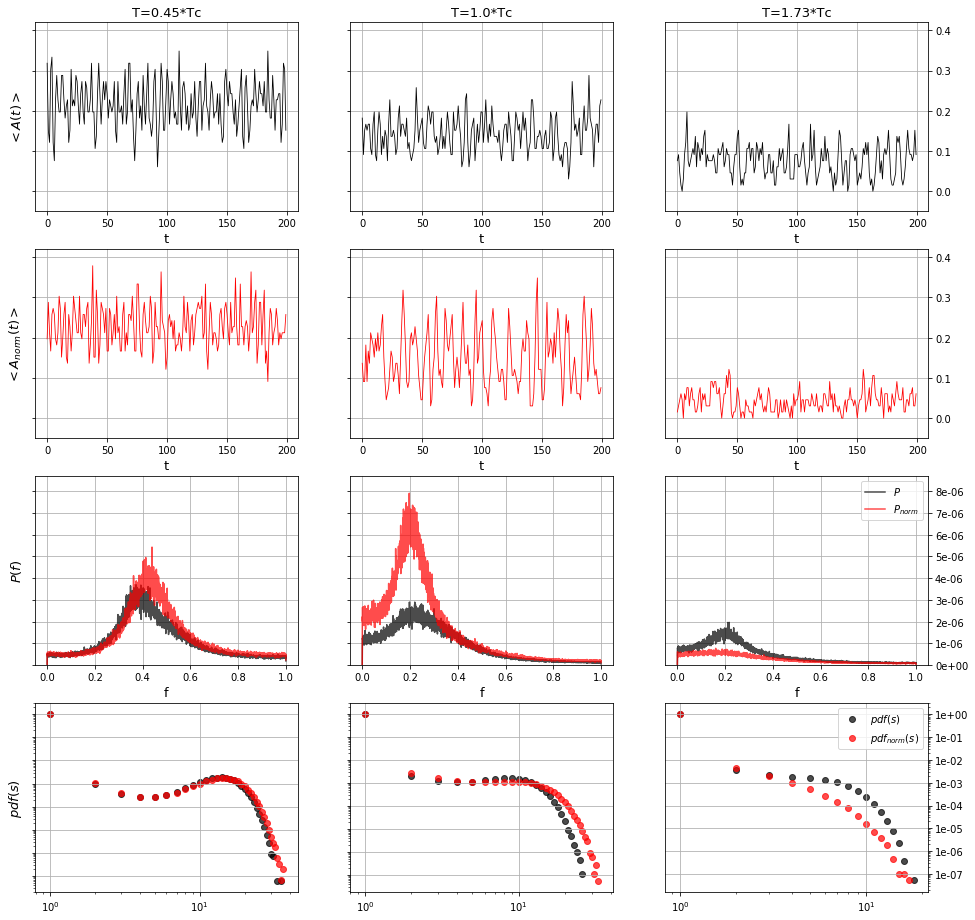

In [4]:
plotter.plot_series(mod)

Di seguito invece ho plottato (per la rete originiale e normalizzata) al variare del parametro di soglia:
- Activity
- First and second cluster size
- Correlazione tra i nodi

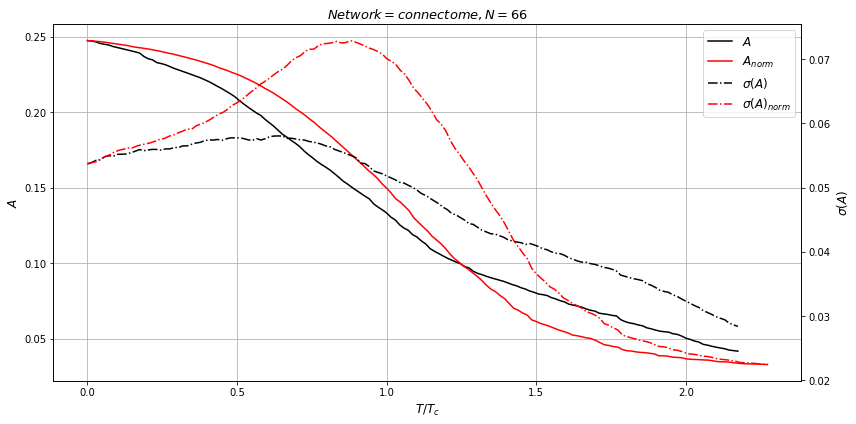

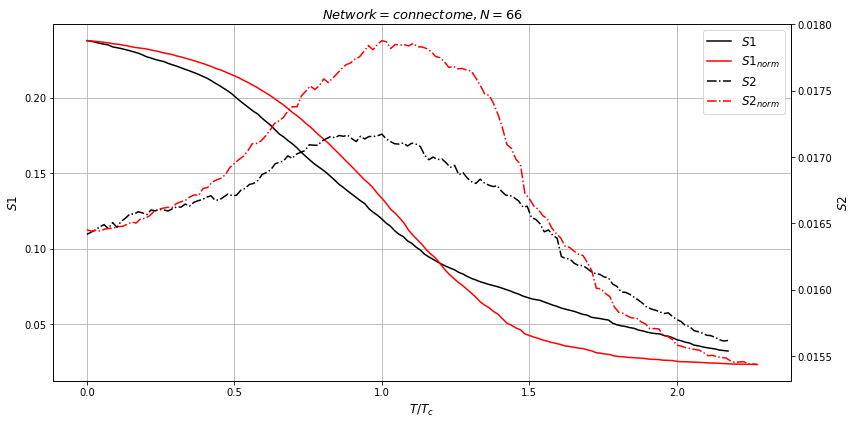

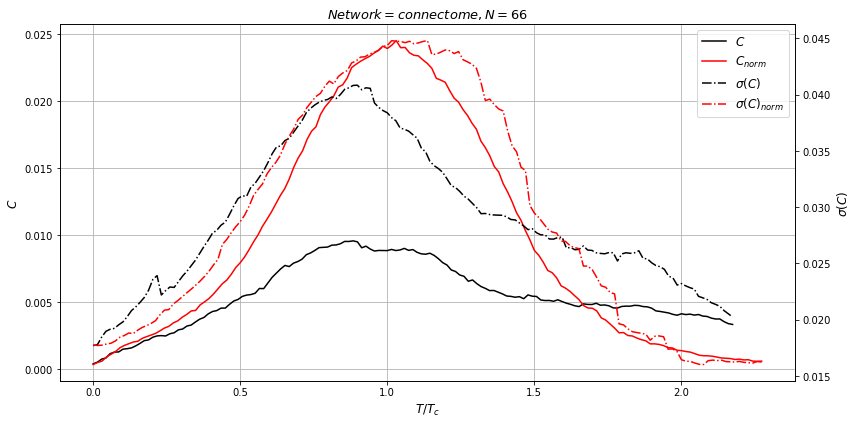

In [5]:
plotter.plot_variable(mod, 'act')
plotter.plot_variable(mod, 'cluster')
plotter.plot_variable(mod, 'corr')
#plotter.plot_variable(mod, 'ent')
#plotter.plot_variable(mod, 'chi')
#plotter.plot_variable(mod, 'tau')
#plotter.plot_variable(mod, 'interevent')

# Pdf cluster size

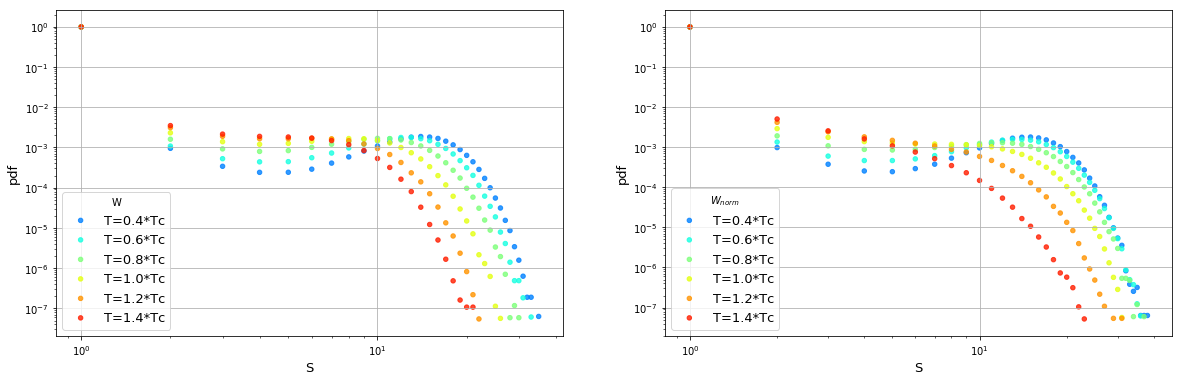

In [6]:
plotter.plot_pdf(mod, 'cluster')

# Pdf interevent time

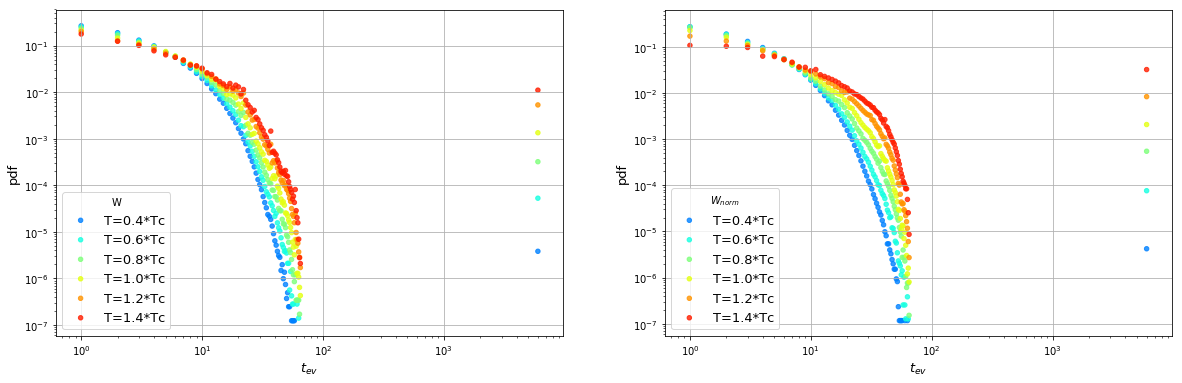

In [7]:
plotter.plot_pdf(mod, 'ev')

# Pdf sustained activity time

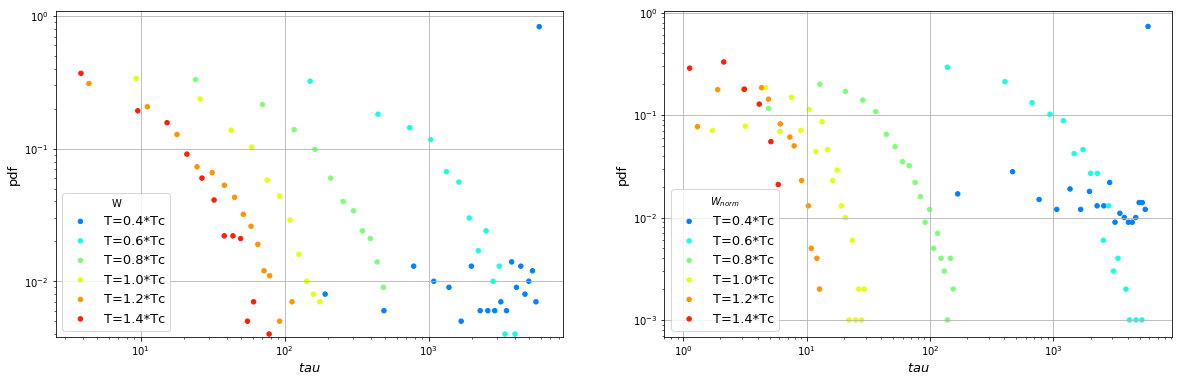

In [8]:
plotter.plot_pdf(mod, 'tau', Nbins=20)

# Dynamical range

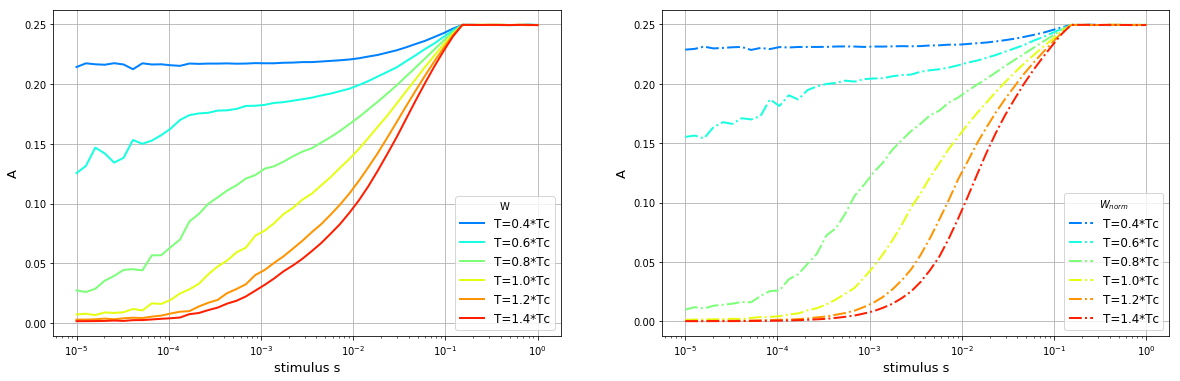

In [9]:
plotter.plot_stimulated(mod)

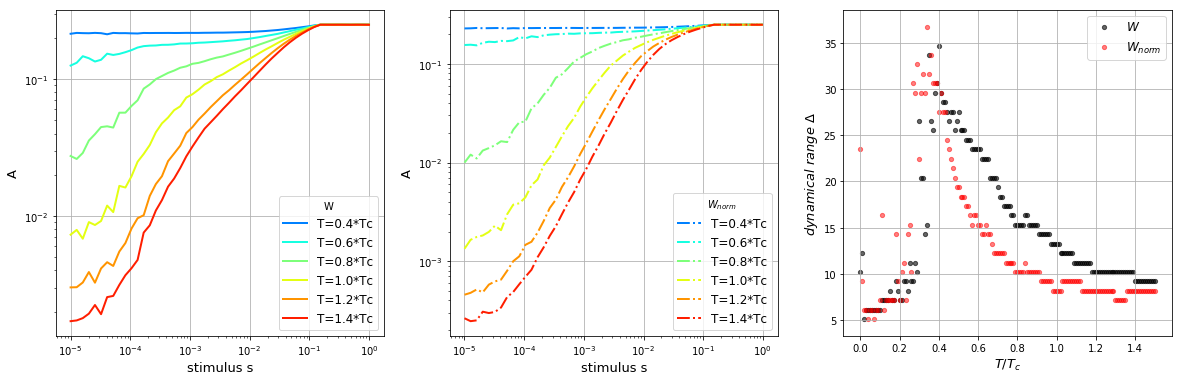

In [10]:
plotter.plot_dynamical_range(mod)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

i = 0

Amax, Amin = np.max(mod.Exc_norm[i]), np.min(mod.Exc_norm[i])
A9 = 0.8*(Amax-Amin) + Amin
A1 =  0.2*(Amax-Amin) + Amin

plt.figure()
plt.xscale('log')
plt.plot(mod.stimuli, mod.Exc[i])
plt.axhline(A9)
plt.axhline(A1)
plt.show()